In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

##**dataset 1**

In [122]:
dataset1 = pd.read_csv("/content/software_requirements_extended (1).csv")
dataset1


,Type,Requirement
0,PE,The system shall refresh the display every 60 ...
1,LF,The application shall match the color of the s...
2,US,If projected the data must be readable. On ...
3,A,The product shall be available during normal ...
4,US,If projected the data must be understandable...
...,...,...
972,FR,There will be a designated phone number that u...
973,FR,Texts sent to that number will be sent to the ...
974,FR,"If a question is not understood by our API, th..."
975,FR,Upon the USB being plugged in the system shall...


In [123]:
print(dataset1.dtypes)


Type           object
Requirement    object
dtype: object


In [124]:
print(dataset1.shape)


(977, 2)


In [125]:
print("Distribution of each requirement type:")
print(dataset1['Type'].value_counts())

Distribution of each requirement type:
Type
FR     312
F      209
NFR    110
US      63
O       58
SE      56
PE      54
LF      34
A       21
SC      21
MN      17
L       10
FT      10
PO       2
Name: count, dtype: int64


In [126]:
print("\nUnique requirement types in 'Type' column:")
print(dataset1['Type'].unique())


Unique requirement types in 'Type' column:
['PE' 'LF' 'US' 'A' 'SE' 'F' 'L' 'O' 'PO' 'SC' 'FT' 'MN' 'FR' 'NFR']


In [127]:
dataset_copy = dataset1.copy()
dataset_copy['Type'] = dataset_copy['Type'].replace({'F': 'FR'})
categories_to_replace = ['A', 'FT', 'L', 'LF', 'MN', 'O', 'PE', 'PO', 'SC', 'SE', 'US']
dataset_copy['Type'] = dataset_copy['Type'].replace(categories_to_replace, 'NFR')



<ipython-input-128-caefe5801deb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset_copy, x='Type', order=dataset1['Type'].value_counts().index, palette='viridis')


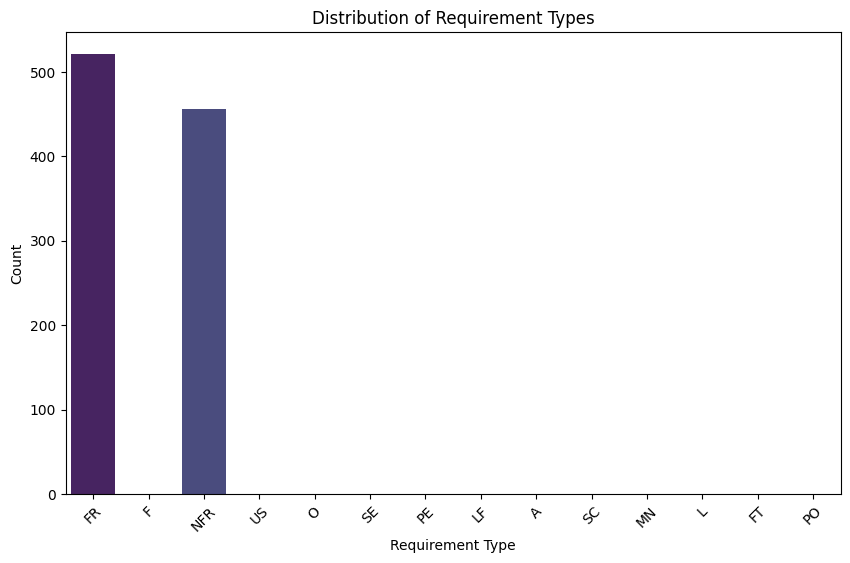

In [128]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset_copy, x='Type', order=dataset1['Type'].value_counts().index, palette='viridis')
plt.title("Distribution of Requirement Types")
plt.xlabel("Requirement Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-129-f24551e50be6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=category, palette='Set2')


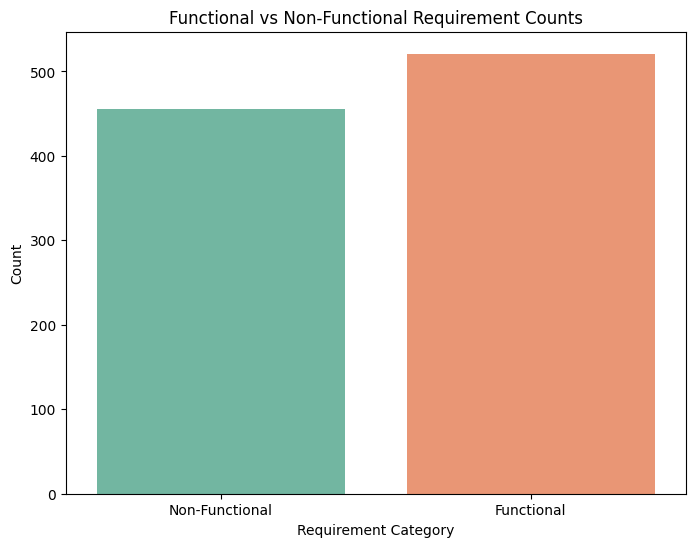

In [129]:
# Create a copy of the dataset to work with
functional_labels = ['F', 'FR']
# Apply the transformation to the copied dataset without altering the original
category = dataset_copy['Type'].apply(lambda x: 'Functional' if x in functional_labels else 'Non-Functional')

# Plot the counts
plt.figure(figsize=(8, 6))
sns.countplot(x=category, palette='Set2')
plt.title("Functional vs Non-Functional Requirement Counts")
plt.xlabel("Requirement Category")
plt.ylabel("Count")
plt.show()


Summary statistics for requirement lengths:


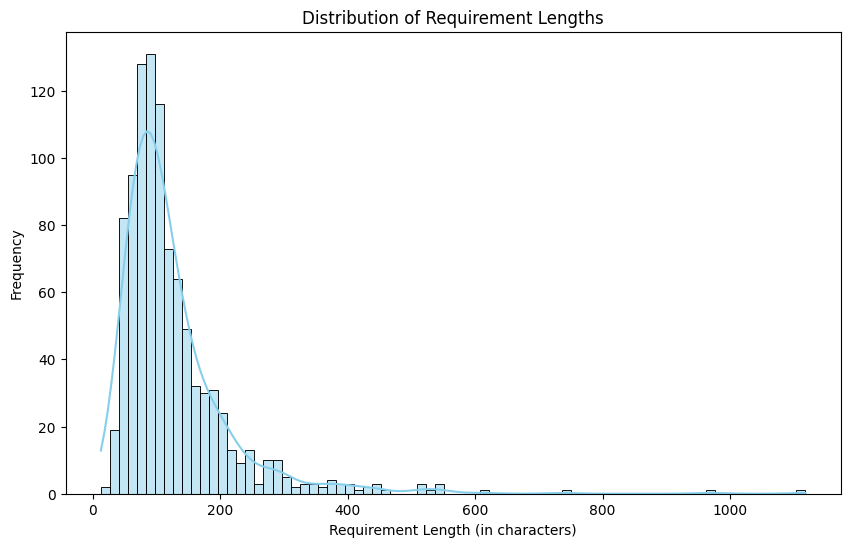

In [130]:
dataset_copy['Requirement_Length'] = dataset_copy['Requirement'].apply(len)
print("Summary statistics for requirement lengths:")
plt.figure(figsize=(10, 6))
sns.histplot(dataset_copy['Requirement_Length'], kde=True, color='skyblue')
plt.title("Distribution of Requirement Lengths")
plt.xlabel("Requirement Length (in characters)")
plt.ylabel("Frequency")
plt.show()

In [131]:
dataset_copy['Word_Count'] = dataset_copy['Requirement'].apply(lambda x: len(x.split()))   # Word count
dataset_copy['Character_Count'] = dataset_copy['Requirement'].apply(len)
print("Summary statistics for word counts:")
print(dataset_copy['Word_Count'].describe())
print("\nSummary statistics for character counts:")
print(dataset_copy['Character_Count'].describe())

Summary statistics for word counts:
count    977.000000
mean      21.146366
std       15.098178
min        2.000000
25%       12.000000
50%       17.000000
75%       24.000000
max      179.000000
Name: Word_Count, dtype: float64

Summary statistics for character counts:
count     977.000000
mean      126.743091
std        92.693852
min        13.000000
25%        75.000000
50%       103.000000
75%       146.000000
max      1118.000000
Name: Character_Count, dtype: float64


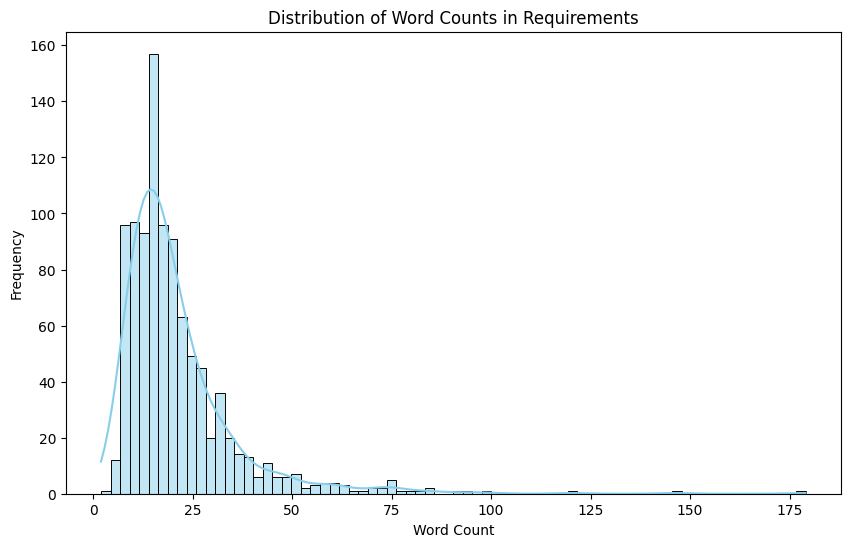

In [132]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset_copy['Word_Count'], kde=True, color='skyblue')
plt.title("Distribution of Word Counts in Requirements")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [133]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [134]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter

nltk.download('punkt')


# 1. Average Length of All Requirements
def average_length(dataset_copy):
    avg_length = dataset_copy['Requirement'].apply(len).mean()
    return avg_length

# 2. Textual Complexity Analysis
def textual_complexity(dataset_copy):
    word_lengths = dataset_copy['Requirement'].apply(lambda x: [len(word) for word in word_tokenize(x)])
    avg_word_length = word_lengths.apply(lambda x: sum(x) / len(x)).mean()
    sentence_counts = dataset_copy['Requirement'].apply(lambda x: len(sent_tokenize(x)))
    avg_sentence_length = dataset_copy['Requirement'].apply(lambda x: len(word_tokenize(x)) / len(sent_tokenize(x)))

    complexity_data = {
        'avg_word_length': avg_word_length,
        'avg_sentence_count': sentence_counts.mean(),
        'avg_sentence_length': avg_sentence_length.mean()
    }

    return complexity_data

# 3. Unique vs. Repeated Requirements
def unique_vs_repeated(dataset_copy):
    requirement_counts = dataset_copy['Requirement'].value_counts()
    repeated_requirements = requirement_counts[requirement_counts > 1]
    unique_requirements_count = len(requirement_counts[requirement_counts == 1])

    return {
        'total_requirements': len(dataset_copy),
        'unique_requirements': unique_requirements_count,
        'repeated_requirements': len(repeated_requirements),
        'repeated_requirements_list': repeated_requirements
    }

# Run the analyses
avg_length = average_length(dataset_copy)
complexity = textual_complexity(dataset_copy)
uniqueness = unique_vs_repeated(dataset_copy)

# Output results
print("Average Length of All Requirements:")
print(avg_length)

print("\nTextual Complexity:")
print(complexity)

print("\nUnique vs. Repeated Requirements:")
print(uniqueness)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average Length of All Requirements:
126.74309109518936

Textual Complexity:
{'avg_word_length': 4.68680406618402, 'avg_sentence_count': 1.3203684749232343, 'avg_sentence_length': 17.417780377248132}

Unique vs. Repeated Requirements:
{'total_requirements': 977, 'unique_requirements': 975, 'repeated_requirements': 1, 'repeated_requirements_list': Requirement
Only registered customers can purchase streaming movies.    2
Name: count, dtype: int64}


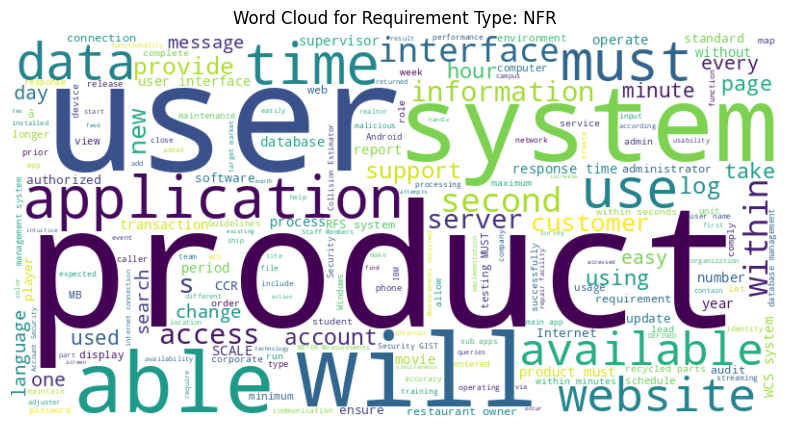

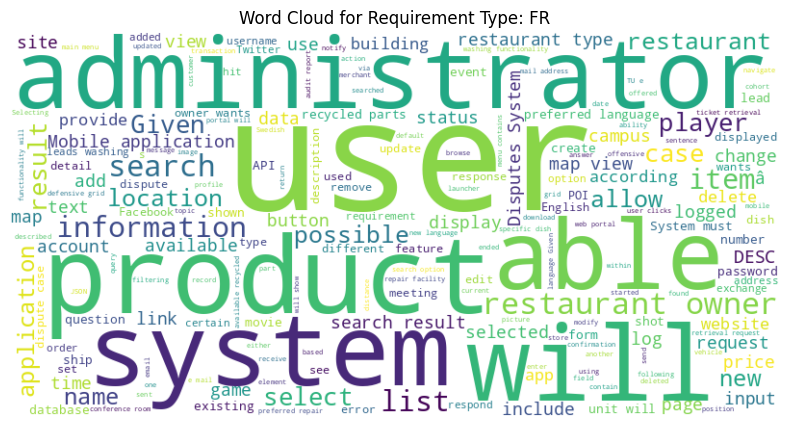

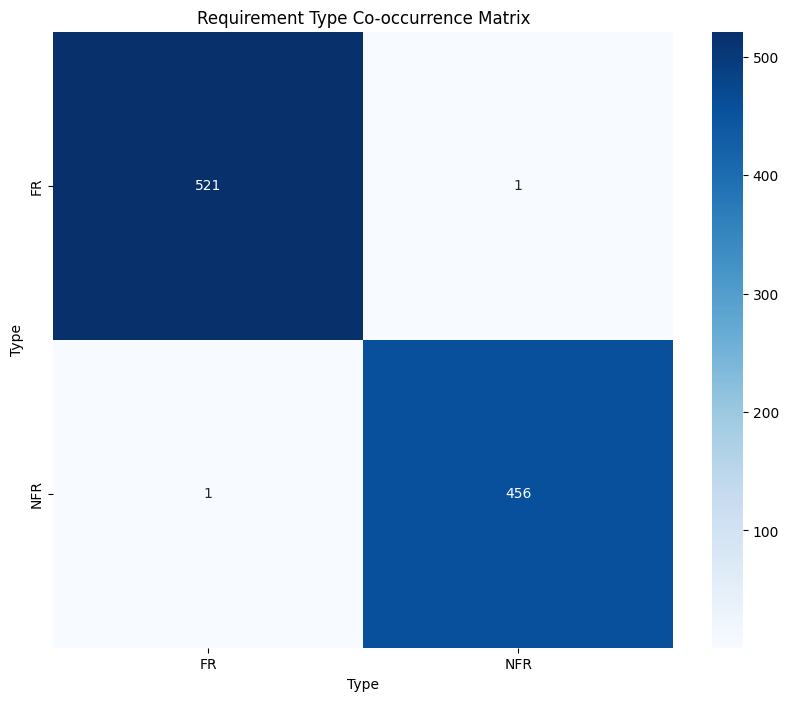

In [135]:
from wordcloud import WordCloud
def generate_word_clouds_by_type(dataset_copy):
    requirement_types = dataset_copy['Type'].unique()

    for req_type in requirement_types:
        text = " ".join(requirement for requirement in dataset_copy[dataset_copy['Type'] == req_type]['Requirement'].astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Requirement Type: {req_type}")
        plt.show()



# 3. Requirement Type Co-occurrence Matrix
def requirement_type_cooccurrence_matrix(dataset_copy):
    # This assumes a requirement can belong to multiple types, stored as lists in the 'requirement_type' column
    dataset_copy = dataset_copy.explode('Type')  # Splits multi-type entries
    co_occurrence = pd.crosstab(dataset_copy['Requirement'], dataset_copy['Type']).T.dot(
        pd.crosstab(dataset_copy['Requirement'], dataset_copy['Type'])
    )

    plt.figure(figsize=(10, 8))
    sns.heatmap(co_occurrence, annot=True, fmt="d", cmap="Blues")
    plt.title("Requirement Type Co-occurrence Matrix")
    plt.show()

# Run visualizations
generate_word_clouds_by_type(dataset_copy)
requirement_type_cooccurrence_matrix(dataset_copy)

In [136]:
# 1. Check for Missing / Incomplete Data
def check_missing_data(dataset_copy):
    missing_data = dataset_copy.isnull().sum()
    incomplete_rows = dataset_copy[dataset_copy.isnull().any(axis=1)]

    print("Missing Data Summary:")
    print(missing_data)
    print("\nRows with Incomplete Data:")
    print(incomplete_rows)

    return missing_data, incomplete_rows

missing_data, incomplete_rows = check_missing_data(dataset1)


Missing Data Summary:
Type           0
Requirement    0
dtype: int64

Rows with Incomplete Data:
Empty DataFrame
Columns: [Type, Requirement]
Index: []


In [137]:
def check_duplicates(dataset_copy):
    duplicate_rows = dataset_copy[dataset_copy.duplicated()]
    print(f"\nNumber of Duplicate Rows: {len(duplicate_rows)}")
    print("Duplicate Rows:")
    print(duplicate_rows)

    return duplicate_rows
duplicate_rows = check_duplicates(dataset_copy)



Number of Duplicate Rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [Type, Requirement, Requirement_Length, Word_Count, Character_Count]
Index: []


##**test dataset**

In [138]:
testDataSet = pd.read_csv("/content/nfr-test.csv")
testDataSet

,Column1,Column2
0,F,The system shall display Events or Activities.
1,F,The display shall have two regions left 2/3 o...
2,F,The data displayed in both the nodes within th...
3,F,The table side of the display shall be split i...
4,F,The top 1/4 of the table will hold events that...
...,...,...
65,SE,The Disputes application shall manipulate and ...
66,SE,All updates to data files or database must be ...
67,L,The Disputes application must conform to the l...
68,L,All business rules specified in the Disputes S...


In [139]:
testDataSet.rename(columns={"Column1": "Type", "Column2": "Requirement"}, inplace=True)

##**Functions**

In [140]:
## lower casing

def lower_casing(df):
  df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
  return df

newDS1=lower_casing(dataset_copy)
newTestDS=lower_casing(testDataSet.copy())


In [141]:
def extract_named_entities(text):
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    named_entities = nltk.ne_chunk(pos_tags, binary=False)
    entities = []
    for chunk in named_entities:
        if hasattr(chunk, 'label'):
            entities.append((chunk.label(), ' '.join(c[0] for c in chunk)))
    return entities

In [142]:
## removing non word and non whitespaces
def remover(df):
  df = df.replace(to_replace=r'[^\w\s]', value='', regex=True)
  return df

newDS1=remover(newDS1)
newTestDS=remover(newTestDS)

In [143]:
## removing digits
def digit_remover(df):
  df = df.replace(to_replace=r'\d', value='', regex=True)
  return df

newDS1=digit_remover(newDS1)
newTestDS=digit_remover(newTestDS)


In [144]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [145]:
## remove puncituation
def remove_punc(df,label):
  xx= []
  for i in range(len(df[label])):
    temp =df[label][i]
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in temp.split()]
    stripped = ' '.join(stripped)
    xx.append(stripped)
  return xx

newDS1['Requirement']=remove_punc(newDS1,'Requirement')
newTestDS['Requirement']=remove_punc(newTestDS,'Requirement')



In [146]:
## before stepping into integration and tokenization phase we just make sure all our datasets have the same features
print(newDS1['Type'].unique())
print(newTestDS['Type'].unique())

['nfr' 'fr']
['f' 'lf' 'us' 'o' 'se' 'l']


In [147]:
## check if all sentences are written in english characters
def count_non_english_characters(df,label):
  count =[]
  for i in range(len(df[label])):
    non_english_chars = re.findall(r'[^a-zA-Z\s]', df[label][i])
    if non_english_chars:  print(non_english_chars , df[label][i])
    count.append(len(non_english_chars))
    # count = len(non_english_chars)
  return sum(count)  # Output: 8


In [148]:
## dataset 1
x=count_non_english_characters(newDS1,'Requirement')
print('Number of non english  characters : ' , x)

['â', 'â'] the twitter âtweetâ interface should be according to the twitter guidelines
['â', 'â'] the facebook âlikeâ interface should be according to the facebook guidelines
['â'] hard drive space gist hard drive space scale the applicationâs need of hard drive space meter mb must no more than mb plan no more than mb wish no more than mb mb defined megabyte
['â', 'œ', 'â', 'â'] design constraints we will use âœwaterfall methodâ and object â oriented programming paradigm we will use java as programming language the android version of the device should be or higher the system requires internet connection all the time
['â'] â the system will be designed in such a way that the algorithms for the four main units will be able to be easily swapped out
['â'] the overall accuracy of the web apiâs response will be measured using a developermade testing set
['â'] the accuracy of the generic question constructionâ part will be close to
['â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â'] 

In [149]:
##test dataset
z=count_non_english_characters(newTestDS,'Requirement')
print('Number of non english  characters : ' , z)

Number of non english  characters :  0


In [150]:
## removing the non english
def remove_non_english_characters(df,label):
  x=[]
  for i in range(len(df[label])):
    temp = df[label][i]
    non_english_chars = re.sub(r'[^a-zA-Z\s]', '', temp)
    x.append(non_english_chars)
  return x

newDS1['Requirement']=remove_non_english_characters(newDS1,'Requirement')
newTestDS['Requirement']=remove_non_english_characters(newTestDS,'Requirement')

## testing our work
print('Number of non english characters dataset 1 : ',count_non_english_characters(newDS1,'Requirement') ,'\nNumber of non english  characters : ',
count_non_english_characters(newTestDS,'Requirement'))

Number of non english characters dataset 1 :  0 
Number of non english  characters :  0



## stemming :  Convert words to their base forms to reduce redundancy.
## lemmatization :  Convert words to their base forms to reduce redundancy.
##named entity recognition :  Identify entities such as people, systems, dates, etc., which could be crucial in defining use cases.



## **Note** : that the differnece between stemming and lemmatization is that

1 ) meaning
stemming : meaning isn't important to me or the proccess
lemmatization : meaning is very important ans=d can actually determine the output

2) based
stemming : rule approch based where it focuses on finding the words with the same root no matter thier meaning
lemmatization : dictionary based approch where it traces the word back to it's root and determine it's meaning based on :-
                        1 - it's dictionary meaning and
                        2 - it's position in the sentence  
3)accuracy
lemmataization is more accurate the stemming

****Ex :  studies****


stemming output : **studi** based on it can be studies or studied
lemmatzation output : **study** based on studies means in the dictionary the action of studying with it's infinitive form is study


In [151]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True


##**Remove Stop Words** :  remove common ones that don't contribute to understanding requirements.

In [152]:


def remove_SW(ds,label):
  x = []
  for i in range(len(ds[label])):
    words = word_tokenize(ds[label][i])
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [word for word in words if word.lower() not in stop_words]
    filtered_sentence = ' '.join(filtered_sentence)
    # print("Filtered Sentence (without stop words):", filtered_sentence)
    x.append(filtered_sentence)
  return x


newDS1['Requirement']=remove_SW(newDS1,'Requirement')
newTestDS['Requirement']=remove_SW(newTestDS,'Requirement')




##**Tokenization** : Split the transcribed text into sentences and words.



In [153]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming newDS1 is already loaded and the column is named 'Requirement'

# Step 1: Get unique words from the 'Requirement' column
unique_words = set(newDS1['Requirement'])
num_unique_words = len(unique_words)

# Step 2: Initialize tokenizer with the number of unique words and an out-of-vocabulary token
tokenizer = Tokenizer(num_words=num_unique_words, oov_token="<OOV>")

# Step 3: Fit the tokenizer on the 'Requirement' column
tokenizer.fit_on_texts(newDS1['Requirement'])

# Step 4: Create a word index
word_index = tokenizer.word_index
print("Word Index:", word_index)

# Step 5: Convert the 'Requirement' column to sequences
sequences = tokenizer.texts_to_sequences(newDS1['Requirement'])

# Step 6: Calculate the length of the longest sequence
maxlen = max(len(seq) for seq in sequences)

# Step 7: Pad the sequences to the length of the longest sequence
padded = pad_sequences(sequences, maxlen=maxlen)

print("\nPadded Sequences:")
print(padded)

# Step 8: Test with new input data
test_data = [
    'the system shall be responsive',
    'the program needs to be done within days'
]

# Convert test data to sequences
test_seq = tokenizer.texts_to_sequences(test_data)

# Pad the test sequences
padded_test_seq = pad_sequences(test_seq, maxlen=maxlen)

print("\nPadded Test Sequences:")
print(padded_test_seq)


Word Index: {'<OOV>': 1, 'shall': 2, 'user': 3, 'product': 4, 'system': 5, 'able': 6, 'restaurant': 7, 'users': 8, 'search': 9, 'application': 10, 'must': 11, 'information': 12, 'time': 13, 'administrator': 14, 'owner': 15, 'use': 16, 'data': 17, 'available': 18, 'within': 19, 'list': 20, 'website': 21, 'given': 22, 'new': 23, 'view': 24, 'case': 25, 'allow': 26, 'results': 27, 'language': 28, 'player': 29, 'interface': 30, 'possible': 31, 'map': 32, 'seconds': 33, 'provide': 34, 'access': 35, 'account': 36, 'page': 37, 'mobile': 38, 'select': 39, 'disputes': 40, 'database': 41, 'number': 42, 'one': 43, 'display': 44, 'parts': 45, 'preferred': 46, 'type': 47, 'used': 48, 'link': 49, 'name': 50, 'items': 51, 'desc': 52, 'response': 53, 'set': 54, 'using': 55, 'server': 56, 'logged': 57, 'login': 58, 'request': 59, 'address': 60, 'minutes': 61, 'menu': 62, 'password': 63, 'email': 64, 'item': 65, 'input': 66, 'building': 67, 'wants': 68, 'security': 69, 'support': 70, 'recycled': 71, 'ad

## **Speech Tagging** : Tagging: Understand the role each word plays in the sentence to help identify action verbs (e.g., "must", "should", "requires") related to requirements.

In [154]:

# Assume the text is already tokenized
tokenized_sentence = ['The', 'system', 'should', 'process', 'orders', 'quickly', 'and', 'efficiently', '.']

# Perform POS tagging on the tokenized sentence
pos_tags = nltk.pos_tag(word_index)

# Display the result
print("POS Tags:", pos_tags)


POS Tags: [('<OOV>', 'JJ'), ('shall', 'MD'), ('user', 'VB'), ('product', 'NN'), ('system', 'NN'), ('able', 'JJ'), ('restaurant', 'NN'), ('users', 'NNS'), ('search', 'VBP'), ('application', 'NN'), ('must', 'MD'), ('information', 'NN'), ('time', 'NN'), ('administrator', 'NN'), ('owner', 'NN'), ('use', 'NN'), ('data', 'NNS'), ('available', 'JJ'), ('within', 'IN'), ('list', 'NN'), ('website', 'VB'), ('given', 'VBN'), ('new', 'JJ'), ('view', 'NN'), ('case', 'NN'), ('allow', 'JJ'), ('results', 'NNS'), ('language', 'NN'), ('player', 'NN'), ('interface', 'NN'), ('possible', 'JJ'), ('map', 'NN'), ('seconds', 'NNS'), ('provide', 'VBP'), ('access', 'NN'), ('account', 'NN'), ('page', 'NN'), ('mobile', 'JJ'), ('select', 'NN'), ('disputes', 'VBZ'), ('database', 'JJ'), ('number', 'NN'), ('one', 'CD'), ('display', 'NN'), ('parts', 'NNS'), ('preferred', 'VBD'), ('type', 'NN'), ('used', 'VBN'), ('link', 'NN'), ('name', 'NN'), ('items', 'NNS'), ('desc', 'JJ'), ('response', 'NN'), ('set', 'VBN'), ('using'

word_tokenize(text): Tokenizes the text into individual words.

nltk.pos_tag(tokens): Tags each word with its respective Part-of-Speech (POS), such as:

NN = Noun

VB = Verb

RB = Adverb

DT = Determiner, etc.

POS Tags Key (Examples):

NN: Noun (singular)

NNS: Noun (plural)

VB: Verb (base form)

VBD: Verb (past tense)

RB: Adverb

JJ: Adjective

## **lemmatization** : refers to understanding the context of the word it's more of a dictnory based method

> Add blockquote



Ex : studies => study
\


In [155]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if needed
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function for lemmatization
def lemmatization(df, label):
    lemmatized_sentences = []  # To store lemmatized sentences

    for i in range(len(df[label])):
        temp = df[label][i]  # Current sentence
        words = word_tokenize(temp)  # Tokenize the sentence

        # Get POS tags for each word
        pos_tags = nltk.pos_tag(words)

        # Define POS mapping
        tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}

        # Lemmatize each word with appropriate POS tag
        lemmatized_words = [
            lemmatizer.lemmatize(word.lower(), tag_dict.get(tag[0].upper(), wordnet.NOUN))
            for word, tag in pos_tags
        ]

        # Join lemmatized words back into a sentence
        lemmatized_sentence = ' '.join(lemmatized_words)
        lemmatized_sentences.append(lemmatized_sentence)

    return lemmatized_sentences

# Apply lemmatization to the 'Requirement' column
newDS1['Lemmatized_Requirement'] = lemmatization(newDS1, 'Requirement')

# Proceed with tokenization and padding for the lemmatized column
unique_words = set(" ".join(newDS1['Lemmatized_Requirement']).split())
num_unique_words = len(unique_words)

# Initialize tokenizer
tokenizer = Tokenizer(num_words=num_unique_words, oov_token="<OOV>")
tokenizer.fit_on_texts(newDS1['Lemmatized_Requirement'])

# Tokenize and pad
sequences = tokenizer.texts_to_sequences(newDS1['Lemmatized_Requirement'])
maxlen = max(len(seq) for seq in sequences)
padded = pad_sequences(sequences, maxlen=maxlen, padding='post')

# Store tokenized and padded sequences back into the DataFrame
newDS1['Tokenized_Lemmatized_Requirement'] = sequences
newDS1['Padded_Lemmatized_Requirement'] = list(padded)

# Print results for verification
print("\nSample Lemmatized Requirements:")
print(newDS1[['Requirement', 'Lemmatized_Requirement']].head())

print("\nSample Padded Tokenized Lemmatized Requirements:")
print(newDS1[['Padded_Lemmatized_Requirement']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Sample Lemmatized Requirements:
                                         Requirement  \
0         system shall refresh display every seconds   
1  application shall match color schema set forth...   
2  projected data must readable x projection scre...   
3  product shall available normal business hours ...   
4  projected data must understandable x projectio...   

                              Lemmatized_Requirement  
0          system shall refresh display every second  
1  application shall match color schema set forth...  
2  project data must readable x projection screen...  
3  product shall available normal business hour l...  
4  project data must understandable x projection ...  

Sample Padded Tokenized Lemmatized Requirements:
                       Padded_Lemmatized_Requirement
0  [5, 2, 595, 33, 107, 39, 0, 0, 0, 0, 0, 0, 0, ...
1  [10, 2, 289, 329, 1010, 66, 596, 505, 1011, 81...
2  [330, 17, 11, 1012, 506, 745, 152, 746, 11, 6,...
3  [4, 2, 19, 747, 290, 82, 201, 3, 35

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
import pandas as pd
import re
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import Tree

# Use 'Lemmatized_Requirement' column if available, otherwise fallback to 'Requirement'
requirement_column = 'Lemmatized_Requirement' if 'Lemmatized_Requirement' in newDS1.columns else 'Requirement'

# 1. TF-IDF Representation with Bigrams/Trigrams
vectorizer_tfidf = TfidfVectorizer(max_features=1000, ngram_range=(2, 3))  # Set to bigrams and trigrams
tfidf_features = vectorizer_tfidf.fit_transform(newDS1[requirement_column])

# Convert to DataFrame for inspection
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
print("TF-IDF Features (Bigrams/Trigrams):\n", tfidf_df.head())

# Add to the DataFrame for reference if needed
newDS1 = pd.concat([newDS1, tfidf_df.add_prefix("TFIDF_")], axis=1)


# 2. Bag-of-Words Representation (removed)
# Skipping the Bag-of-Words section as per request


# 3. Word Embeddings using Word2Vec
# Tokenize the text
tokenized_text = newDS1[requirement_column].apply(word_tokenize)

# Train Word2Vec Model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=2, workers=4)

# Function to get average Word2Vec embeddings
def get_avg_word2vec(sentence, model, vector_size):
    words = word_tokenize(sentence)
    valid_words = [word for word in words if word in model.wv.key_to_index]
    if not valid_words:
        return [0] * vector_size
    return sum(model.wv[word] for word in valid_words) / len(valid_words)

# Apply Word2Vec embeddings to the dataset
newDS1['word2vec_features'] = newDS1[requirement_column].apply(lambda x: get_avg_word2vec(x, word2vec_model, 100))

# Example output of Word2Vec features
print("Word2Vec Feature Example:\n", newDS1['word2vec_features'].iloc[0])



# 4. Domain-Specific Features

# Function to count occurrences of technical terms
technical_terms = ['system', 'application', 'data', 'display', 'projection', 'schema']
def count_technical_terms(text, terms):
    return sum(1 for word in text.split() if word in terms)

newDS1['technical_term_count'] = newDS1[requirement_column].apply(lambda x: count_technical_terms(x, technical_terms))

# Function to count named entities
def count_named_entities(text):
    try:
        chunks = ne_chunk(pos_tag(word_tokenize(text)))
        named_entities = [chunk for chunk in chunks if isinstance(chunk, Tree)]
        return len(named_entities)
    except Exception:
        return 0

newDS1['named_entity_count'] = newDS1[requirement_column].apply(count_named_entities)


# 5. New Domain-Specific Features
# Named Entity Frequency Count
def count_named_entity_frequency(text, entities):
    """
    Count the frequency of specified named entities in the text.
    """
    try:
        # Tokenize and POS tag
        chunks = ne_chunk(pos_tag(word_tokenize(text)))

        # Extract named entities
        named_entities = [chunk for chunk in chunks if isinstance(chunk, Tree)]

        # Count frequency of specified entities
        entity_count = {entity: 0 for entity in entities}
        for chunk in named_entities:
            entity = " ".join(word for word, tag in chunk)
            if entity in entities:
                entity_count[entity] += 1
        return entity_count
    except Exception:
        return {entity: 0 for entity in entities}

# Define domain-specific named entities to track
named_entities_list = ['System', 'Data', 'Application', 'Project', 'Server']  # Example entities

# Apply to the 'Requirement' column (or use 'Lemmatized_Requirement' if available)
newDS1['named_entity_freq'] = newDS1[requirement_column].apply(lambda x: count_named_entity_frequency(x, named_entities_list))

# Convert the dictionary into separate columns for each named entity
named_entity_df = pd.json_normalize(newDS1['named_entity_freq'])
named_entity_df.fillna(0, inplace=True)
newDS1 = pd.concat([newDS1, named_entity_df], axis=1)


# Functional vs Non-Functional Requirement Classification (using keywords)
def classify_functional_non_functional(text, functional_keywords, non_functional_keywords):
    """
    Classify text based on functional and non-functional keywords.
    """
    functional_count = sum(1 for word in text.split() if word.lower() in functional_keywords)
    non_functional_count = sum(1 for word in text.split() if word.lower() in non_functional_keywords)
    return functional_count, non_functional_count

# Define keywords for functional and non-functional requirements
functional_keywords = ['user', 'interface', 'operation', 'system', 'task', 'input']
non_functional_keywords = ['performance', 'security', 'scalability', 'reliability', 'availability']

# Apply to the 'Requirement' column
newDS1['functional_count'], newDS1['non_functional_count'] = zip(*newDS1[requirement_column].apply(
    lambda x: classify_functional_non_functional(x, functional_keywords, non_functional_keywords)
))

# Example output of the new features
print(newDS1[['Requirement', 'technical_term_count', 'named_entity_count', 'named_entity_freq', 'functional_count', 'non_functional_count']].head())


TF-IDF Features (Bigrams/Trigrams):
    able access  able add  able browse  able easily  able easily swap  \
0          0.0       0.0          0.0          0.0               0.0   
1          0.0       0.0          0.0          0.0               0.0   
2          0.0       0.0          0.0          0.0               0.0   
3          0.0       0.0          0.0          0.0               0.0   
4          0.0       0.0          0.0          0.0               0.0   

   able handle  able input  able interface  able log  able search  ...  \
0          0.0         0.0             0.0       0.0          0.0  ...   
1          0.0         0.0             0.0       0.0          0.0  ...   
2          0.0         0.0             0.0       0.0          0.0  ...   
3          0.0         0.0             0.0       0.0          0.0  ...   
4          0.0         0.0             0.0       0.0          0.0  ...   

   within establish  within hour  within main  within main menu  within mile  \
0    

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Generate Bag-of-Words Features
vectorizer_bow = CountVectorizer(max_features=1000, ngram_range=(1, 2))  # Unigrams and bigrams
bow_features = vectorizer_bow.fit_transform(newDS1['Lemmatized_Requirement'])  # Use the lemmatized column

# Convert to DataFrame
bow_df = pd.DataFrame(bow_features.toarray(), columns=vectorizer_bow.get_feature_names_out())

# Step 2: Add BoW Features to the Dataset
bow_df = bow_df.add_prefix("BOW_")
newDS1 = pd.concat([newDS1, bow_df], axis=1)

# Step 3: Update Feature Set for Model Training
# Add BoW features
bow_columns = [col for col in newDS1.columns if col.startswith("BOW_")]

# Ensure all relevant features are included
X = newDS1[
    ['technical_term_count', 'named_entity_count']  # Add domain-specific features
].copy()

# Add TF-IDF features
tfidf_columns = [col for col in newDS1.columns if col.startswith("TFIDF_")]
X = pd.concat([X, newDS1[tfidf_columns]], axis=1)

# Add Bag-of-Words features
X = pd.concat([X, newDS1[bow_columns]], axis=1)

# Add Word2Vec features
word2vec_df = pd.DataFrame(newDS1['word2vec_features'].tolist(), index=newDS1.index)
X = pd.concat([X, word2vec_df], axis=1)

# Step 4: Target Labels
y = newDS1['Type']  # Replace with the actual target column name

# Ensure all column names in X are strings
X.columns = X.columns.astype(str)

# Step 5: Train and Evaluate Models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy on Test Set: {accuracy * 100:.2f}%")





SVM Accuracy on Test Set: 85.37%
Logistic Regression Accuracy on Test Set: 88.78%
Random Forest Accuracy on Test Set: 80.95%
Gradient Boosting Accuracy on Test Set: 82.31%
